<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/P2_4_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression for computational neuroscience

**Zhuanghua Shi (Nov. 24th, 2021)**

Inn neurobiologicla modeling we are often dealing with arrays of variables. For example, the activities of all of the neurons in a network at a given time, the firing rate of neuronn in each of many small epochs of time; the weights of all of the synapes impinging on a postsynapitc cell. The natural language for thinking about and analyzing the behavior of such arrays of variables is the language of vectors and matrices. 


## Matrix and Vector (Optional)

There are several arithmetic operations defined on vectors and matrices.

In [1]:
import numpy as np

a = np.array([1,2,3])
b = np.array([4,5,6])
print(3*a)
print(a - b)


[3 6 9]
[-3 -3 -3]


In [ ]:
x = np.random.random((5,5))
y = np.random.random((5,5))
print(x)
print(y)
print(x+y)

[[0.05491462 0.78273345 0.88603491 0.3592183  0.85036491]
 [0.69188389 0.52104915 0.84030971 0.01734402 0.31550732]
 [0.47882176 0.01493439 0.43001527 0.32330317 0.12311434]
 [0.80588462 0.9425507  0.01388475 0.84032303 0.67910847]
 [0.90236392 0.86344192 0.97584419 0.43834883 0.07534173]]
[[0.89481107 0.67596597 0.62455573 0.59430523 0.11791265]
 [0.01234299 0.40108628 0.493521   0.98342292 0.06462904]
 [0.54911854 0.08872745 0.93618064 0.21274724 0.90217274]
 [0.2377658  0.39759529 0.63636045 0.99360618 0.11179851]
 [0.7388838  0.72755473 0.36696047 0.02729125 0.80027528]]
[[0.9497257  1.45869942 1.51059064 0.95352353 0.96827756]
 [0.70422687 0.92213543 1.33383071 1.00076694 0.38013635]
 [1.0279403  0.10366185 1.36619591 0.53605041 1.02528708]
 [1.04365042 1.340146   0.6502452  1.83392921 0.79090698]
 [1.64124772 1.59099665 1.34280466 0.46564009 0.87561701]]


#### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. 



__Example__

Suppose we want to subtract the mean from an array __x__. We first demonstrate how we realize this using classic programming approach. And then we use broadcasting from numpy. 

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(x)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# second approach using broadcasting

xm = np.mean(x,axis = 1)
print(xm)
(x.T - xm).T


[ 2.  5.  8. 11.]


array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

Question: Please write the matrix of the above implementation. 

### Multiplication

There are three types of multiplications for matrices. 

1. __Matrix multiply__

$$A_{m,n} B_{n,p} = 
 \begin{pmatrix}
  a_{0,0} &  \cdots & a_{0,n-1} \\
  a_{1,0} &  \cdots & a_{1,n-1} \\
  \vdots  &  \ddots & \vdots  \\
  a_{m-1,1}  & \cdots & a_{m-1,n-1} 
 \end{pmatrix} \begin{pmatrix}
  b_{0,0} &  \cdots & b_{0,p-1} \\
  b_{1,0} &  \cdots & b_{1,p-1} \\
  \vdots  &  \ddots & \vdots  \\
  b_{n-1,1}  & \cdots & b_{n-1,p-1} 
 \end{pmatrix} \\
 = \begin{pmatrix}
  \sum_j a_{0,j}b_{j,o} &  \cdots & \sum_j a_{m-1,j}b_{j,o} \\
  \sum_j a_{1,j}b_{j,o} &  \cdots & \sum_j a_{m-1,j}b_{j,1} \\
  \vdots  &  \ddots & \vdots  \\
  \sum_j a_{m-1,j}b_{j,o}  & \cdots & \sum_j a_{m-1,j}b_{j,p-1} 
 \end{pmatrix} $$

In [ ]:
X = np.array([[1,2,3],[4,5,6]])
Y = np.array([[7,8],[9,10],[11,12]])
print(X)
print(Y)

[[1 2 3]
 [4 5 6]]
[[ 7  8]
 [ 9 10]
 [11 12]]


In [ ]:
# multiple in python is X.dot(Y), or np.dot(X,Y)
# please check the finnal output dimension!
X.dot(Y)

array([[ 58,  64],
       [139, 154]])

In [ ]:
# Question: What is the output of Y.dot(X)?

# You code here
Y.dot(X)

array([[ 39,  54,  69],
       [ 49,  68,  87],
       [ 59,  82, 105]])

__2. Inner Product__

$X\cdot Y = [x_{ij}*y_{ij}]$

Note, inner product must be applied to the matrices with the __same dimension_!

In [ ]:
# please try to run X*Y, and see what is the output. 

X*Y.T 

array([[ 7, 18, 33],
       [32, 50, 72]])

#### Example

Suppose we have 4 neurons with initial values [1,2,1,2] and all send their signals to a postsynaptic cell with weights of [0.2, 0.3, 0.5 0.6], the postsynaptic cell receives input I will be:

$\sum(1,2,1,2) \cdot (0.2,0.3,0.5,0.6) = (1,2,1,2) 
\begin{pmatrix}0.2 \\ 0.3 \\ 0.5 \\ 0.6\end{pmatrix}$

In [ ]:
# implementation
neurons = np.array([1,2,1,2])
weights = np.array([0.2, 0.3, 0.5, 0.6])
I = np.sum(neurons*weights)
print(I)

2.5


In [ ]:
# alternative implementation using matrix
np.inner(weights, neurons)


2.5

__3. Outer product__

please try yourself to see what the output of $neurons^T\cdot weights$ is. 

In [ ]:
# 
np.outer(weights, neurons)

array([[0.2, 0.4, 0.2, 0.4],
       [0.3, 0.6, 0.3, 0.6],
       [0.5, 1. , 0.5, 1. ],
       [0.6, 1.2, 0.6, 1.2]])

## 1. Simple Linear Regression
A linear regression is to find a relation between the output $y$ and input $X$ in a linear relationship. In mathematical notation, if $\hat{y}$ is the predicted value.

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

where the vector $w = (w_1,..., w_p)$ as ``coef_`` and $w_0$ as ``intercept_``.

`LinearRegression` fits a linear model with coefficients
$w = (w_0, ..., w_p)$ to minimize the residual sum
of squares between the observed targets in the dataset, and the
targets predicted by the linear approximation. Mathematically it
solves a problem of the form:

$$ \min_{w} || X w - y||_2^2$$

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)


### 5 Steps for linear regression

1. Import packages
2. provide data
3. create a regression model and fit it with existing data
4. check the results of the model (goodness of fit)
5. apply the model for predictions



### Linear Regression with statsmodels

`statsmodels` provides more statistics and other statistical models, as well as for conducting statistical tests, and statistical data exploration.

`pingouin` alsp provides simple linear regression. 

In [ ]:
!pip install pingouin

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg
%matplotlib inline

Let's use this [dataset](https://raw.githubusercontent.com/contactsunny/data-science-examples/master/salaryData.csv), which contains the salary and Experience. Let's explore the data and do linear regression

In [4]:
# import csv file using pandas.read_csv
dataset = pd.read_csv('https://raw.githubusercontent.com/contactsunny/data-science-examples/master/salaryData.csv')

dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


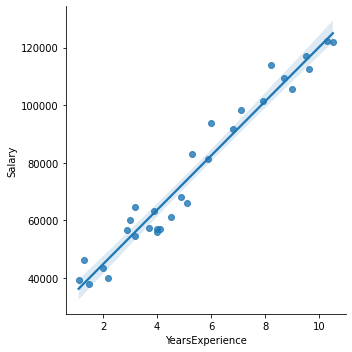

In [12]:
sns.lmplot(data = dataset, x = 'YearsExperience', y = 'Salary')

In `statsmodels`, the linear regression is called 'ordinary least square' (OLS). There are other linear regression models (Generalized least squares, weighted least squares, linear mixed effects models), which we will not cover here. If you are interested in those, please refer to [the official website](https://www.statsmodels.org/dev/examples/index.html#linear-regression-models).

There are two ways to do regression:

1. Numpy arrays
2. Pandas data.frame using formula 

In [6]:
# Method 1: Numpy arrays, you need to explicitly specify the column of constant
Xc = sm.add_constant(dataset.YearsExperience)
# linear model OLS
model = sm.OLS(dataset.Salary,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        10:35:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Method 2: using formula
model = smf.ols(formula = 'Salary ~ YearsExperience', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        10:39:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both methods give the same results. The latter with formula is easier to understand. Readability is better. 

## 2. Multivariate linear regression

Here we use our recent published multisensory contextual study for an illustration of multivariate regression:

* Chen, S., Shi, Z., Müller, H. J., & Geyer, T. (2021). Multisensory visuo-tactile context learning enhances the guidance of unisensory visual search. Scientific Reports, 11(1), 9439. https://doi.org/10.1038/s41598-021-88946-6 

In this study, we comapred multisensory learning in different configurations (Old vs. New) and different multisensory environments. The original study used hierarchical drift-diffusion model (HDDM) and partial pooling methods to estimated HDDM parameters, which is a bit more complex than we do here. 

Here we only illustrate that we can also estimate behavioral data using simple linear regression to interpret the findings. 

   subj_idx condition  epoch        rt
0         1   v_v_new      1  1.517301
1         1   v_v_new      2  0.920525
2         1   v_v_new      3  0.864780
3         1   v_v_new      4  1.048344
4         1   v_v_new      5  0.911363


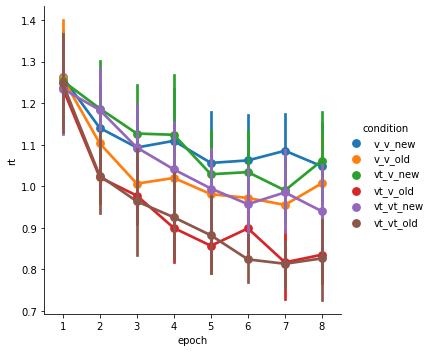

In [32]:
# first load data and visualize it. 
data = pd.read_csv('https://osf.io/58wqy/download')
mdata = data.groupby(['subj_idx','condition','epoch']).rt.mean().reset_index()
print(mdata.head())
sns.catplot(data = mdata, kind = 'point', 
                    x = 'epoch', y = 'rt', hue = 'condition')


The above figure shows the typical procedual learning effect. Intially the reaction was slow, and gradually became faster and reach some platue. In the original paper, we use exponential function to capture this $RT = RT_0 + \Delta e^{-\alpha N} $, where $N$ is the epoch number. 

 

For simplicity, here we log-tranform the epoch, and see if we can get a linear relationship. The idea behind this is that the learning benefits reduces as the number of epochs increases. Thus, to get the same ammount of reduction in RT, you need more epochs (number of blocks). 

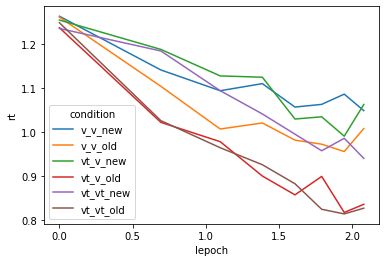

In [41]:
#if we plot in log-scale for x-axis
mdata['lepoch']  = np.log(mdata.epoch)
mm = mdata.groupby(['lepoch','condition']).rt.mean().reset_index()
f = sns.lineplot(data = mm, 
                    x = 'lepoch', y = 'rt', hue = 'condition')
plt.show()


For the illustration purpose, we only focus on the visual-tactile conditons. 

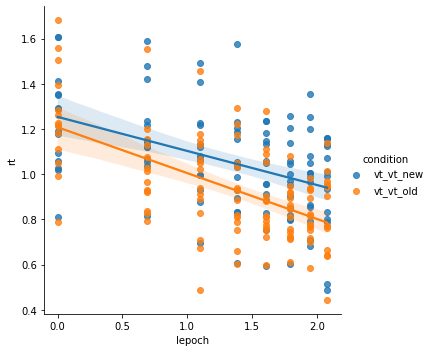

In [42]:
vt = mdata.query('condition == "vt_vt_new" | condition == "vt_vt_old"')
# visualize
sns.lmplot(data = vt, x = 'lepoch', y = 'rt', hue = 'condition')

Using the scatter plot, we see there were huge individual differences. 

To model the both conditions, we should first assume what kind of linear models would be. 

* One could assume that the 'old' vs. 'new' did not differ in the learning rate, but differ in the intercept. 
* one could assume there was interaction between the context (old/new) and procedual learning (epochs). 

The first hypothesis would be:

$$RT = a_0 + a_{d} + b \cdot ln(Epoch), $$
where $a_d$ is the difference between the old and new. 

The second hypothesis would be:

$$RT = a_0 + a_{d} + (b_0+b_d) \cdot ln(Epoch), $$
where $b_d$ is the difference in the slope between two conditions. 

### Syntax of R-Type formula. 

A formulas is an unevaluated expression, which denotes the relationships between the independent variables and dependent variables. The relationship uses the symbol `~`. On the left side is the dependent variable, while on the right side is the independent variables. For example,

` y ~ x` is the simple linear regression. 

If you have two independent variables, and they are independent with each other, you use `+` symbol.

`y ~ x + z`

When you want to include their interaction (using `:` symbol), the formula would be:

`y ~ x + z + x:z`

For simplicity, the above formula can be simplified as 

` y ~ x*z` (i.e., including main factors and their interactions). 



In [43]:
# apply linear regression (assumption with interactions)
model1 = smf.ols(formula = 'rt ~ lepoch*condition', data = vt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     33.33
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           8.45e-18
Time:                        19:21:43   Log-Likelihood:                 49.384
No. Observations:                 224   AIC:                            -90.77
Df Residuals:                     220   BIC:                            -77.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.2535      0.042     30.115      0.000       1.171       1.336
condition[T.vt_vt_old]           -0.0460      0.059     -0.781      0.436      -0.162       0.070
lepoch                           -0.1507      0.028     -5.358      0.000      -0.206      -0.095
lepoch:condition[T.vt_vt_old]    -0.0521      0.040     -1.309      0.192      -0.130       0.026
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.555
Skew:                           0.112   Prob(JB):                        0.758
Kurtosis:                       3.096   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note, in the above regression, we have categorical variable `condition` (Old and New). In the linear regression, the categorical variable will first be translated into dummy variable(s). Here:

$$RT = a_0 + a_{old} + (b_0 + b_{old})\cdot ln(\text{Epoch})$$

That is, it assumes the new and old have different intercepts and slopes. The 'new' condition has $a_0$ and $b_0$, while the 'old' has $a_0 + a_{old}$ and $b_0 + b_{old}$. 



The above regression shows that there were significant negative slope and positive slope, but the differences between the old and new condition, indicated by the $a_{old}, b_{old}$, was not significance. 

**Why? and possible reasons?**


Alternative model: No interaction. 

In [44]:
# alternative model: no interaction (i.e., the slope were the same)
model2 = smf.ols(formula = 'rt ~ lepoch + condition', data = vt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     48.98
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.47e-18
Time:                        19:23:53   Log-Likelihood:                 48.514
No. Observations:                 224   AIC:                            -91.03
Df Residuals:                     221   BIC:                            -80.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.2880      0.032     39.923      0.000       1.224       1.352
condition[T.vt_vt_old]    -0.1150      0.026     -4.388      0.000      -0.167      -0.063
lepoch                    -0.1767      0.020     -8.872      0.000      -0.216      -0.137
==============================================================================
Omnibus:                        1.055   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.828
Skew:                           0.141   Prob(JB):                        0.661
Kurtosis:                       3.097   Cond. No.                         5.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see the difference in the intercept between the old and new conditions were highly significant! The old condition had 115 ms less in the intercept (i.e., 115 ms faster in general). 

In [45]:
#  model 3: with an interaction, but did not differ in intercept
model3 = smf.ols(formula = 'rt ~ lepoch + lepoch:condition', data = vt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     49.78
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.42e-18
Time:                        19:26:16   Log-Likelihood:                 49.074
No. Observations:                 224   AIC:                            -92.15
Df Residuals:                     221   BIC:                            -81.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.2305      0.029     41.845      0.000       1.173       1.288
lepoch                           -0.1368      0.022     -6.290      0.000      -0.180      -0.094
lepoch:condition[T.vt_vt_old]    -0.0799      0.018     -4.523      0.000      -0.115      -0.045
==============================================================================
Omnibus:                        0.656   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.458
Skew:                           0.102   Prob(JB):                        0.795
Kurtosis:                       3.088   Cond. No.                         5.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above model 3 also showed that if we assumed the slope was different for the old and new conditions, we also obtained significance!

The question arises: __which model is the best model?__

In the output of model summary, you can find one key parameter `Adjusted R-squared`. The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors. In other words, compared to the unadjusted R-squared, there is penalty in adding more predictors (variables). 

The adjusted R-squared are relative close. Model 3 was the best among three candidates. 

One issue we haven't addressed in the above example is that the experimental design was within-subject design, but the simple linear regression simply pooled all data together! The individual difference may weaken the statistical inference. We address this in the next section using "Linear mixed model". 

## 3. Linear Mixed model

In the standard linear regression, all data points are treated as independent. However, in most behavioral studies, we have within-subject design, which help us to disassoicate the individual difference from the main manipulation. 

The linear mixed model includes unique effects for individual subjects, which can extract those individual difference from the parameters estimates. 


Consider a simple regression,

$$Y = a + b X + \epsilon$$

If we assume the intercept may varY among participants, but individual differences may cancel out each other in the group-level intercept, we have the following mixed model:

$$ Y = a + a_{ind} + bX  + \epsilon,$$

where $a_{ind} \sim N(0, \sigma_a)$. 

If we further assume that individuals have different slopes as well, we will have

$$Y = a + a_{ind} + (b + b_{ind})X  + \epsilon,$$
where  $b_{ind} \sim N(0, \sigma_b)$.

In [60]:
# mixed model: Intercept difference
mix1 = smf.mixedlm('rt ~ lepoch + condition', data = vt, groups = vt.subj_idx)
res1 = mix1.fit()
res1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:                 MixedLM     Dependent Variable:     rt     
No. Observations:      224         Method:                 REML   
No. Groups:            14          Scale:                  0.0194 
Min. group size:       16          Likelihood:             96.1444
Max. group size:       16          Converged:              Yes    
Mean group size:       16.0                                       
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               1.288    0.044  29.014 0.000  1.201  1.375
condition[T.vt_vt_old] -0.115    0.019  -6.172 0.000 -0.152 -0.078
lepoch                 -0.177    0.014 -12.481 0.000 -0.204 -0.149
Group Var               0.020    0.062                            
==================================================================

"""

In [58]:
# mixed model with 2 random effects
mix2 = smf.mixedlm("rt ~ lepoch* condition", data = vt, groups = vt.subj_idx, re_formula='~lepoch')
res2 = mix2.fit()
res2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  log-likelihood, including the fixed effects


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                  MixedLM       Dependent Variable:       rt      
No. Observations:       224           Method:                   REML    
No. Groups:             14            Scale:                    0.0167  
Min. group size:        16            Likelihood:               101.9885
Max. group size:        16            Converged:                Yes     
Mean group size:        16.0                                            
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      1.254    0.059 21.196 0.000  1.138  1.369
condition[T.vt_vt_old]        -0.046    0.039 -1.182 0.237 -0.122  0.030
lepoch                        -0.151    0.027 -5.490 0.000 -0.204 -0.097
lepoch:condition[T.vt_vt_old] -0.052    0.026 -1.983 0.047 -0.104 -0.001
Group Var                      0.038    0.137                           
Group x lepoch Cov            -0.011    0.051                           
lepoch Var                     0.006    0.025                           
========================================================================

"""

To compare multiple mixed models, you can use the likelihood values shown in the summaries. 

## Conclusion

Linear regression is the basic modeling tool when the independent  and dependent variables both are continuous (interval scales). Using mixed linear models you could reduce the estimation errors by removing the inter-subject variabilities.  

## Resources

* [Linear Algebra for Theoretical Neuroscience by Ken Miller](http://www.columbia.edu/cu/neurotheory/Ken/math-notes/) 
* [Mathematics for Computational Neuroscience & Imaginng by John Porrill.](https://www.sheffield.ac.uk/polopoly_fs/1.13304!/file/maths.pdf) 
* [Linear Mixed Effect models Examples](https://github.com/statsmodels/statsmodels/blob/main/examples/notebooks/mixed_lm_example.ipynb)